# Imports

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [131]:
print(tf.__version__)

2.13.0


# Directory

In [132]:
data_dir = r"./data_newest"

# Parameters

In [133]:
batch_size = 32
img_height = 180
img_width = 180

# Dataset Splits

Training Dataset

In [134]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 359 files belonging to 6 classes.
Using 288 files for training.


Validation Dataset

In [135]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 359 files belonging to 6 classes.
Using 71 files for validation.


# Configuring Dataset for Performance

In [136]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardizing Data

In [137]:
normalization_layer = layers.Rescaling(1./255)

# Model Creation

In [138]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compiling the Model

In [139]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the Model

In [140]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
9/9 [==============================] - 2s 164ms/step - loss: 1.4522 - accuracy: 0.5590 - val_loss: 0.4940 - val_accuracy: 0.9577
Epoch 2/20
9/9 [==============================] - 1s 143ms/step - loss: 0.1482 - accuracy: 0.9896 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 1s 144ms/step - loss: 0.0987 - accuracy: 0.9792 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 1s 147ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 8.8874e-04 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 1s 146ms/step - loss: 7.1319e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 1s 146ms/step - loss: 0.0071 - accuracy: 0.9965 - val_loss: 1.4849e-04 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 1s 152ms/step - loss: 0.0049 - accuracy: 0.9965 - val_loss: 1.2144e-04 - val_accuracy: 1.0000
Epoc

# Viewing Results

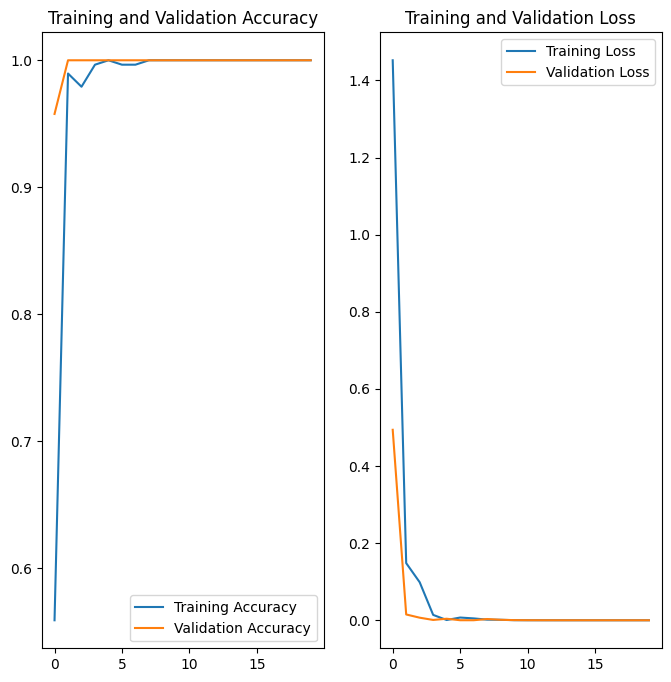

In [141]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Saving the Model

In [ ]:
model.save("dice_detection_final.h5")